In [1]:
import sympy
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.constants as c
import scipy
import scipy.optimize
from scipy import integrate

plt.style.use('vedant')

## Dust Temperatures (Xu et al. 2018)

In [2]:
# Large grain approximation
# Input in K, Rsun, Rsun

def T_bb(T_star, R_star, r):
    return 1.2e3 * (T_star / 15900) * (R_star / 0.013)**(1/2) * (r / 1.16)**(-1/2)

# Small grain approximation
# Input in K, Rsun, Rsun

def T_rayl(T_star, R_star, r):
    return 2e3 * (T_star / 15900) * (R_star / 0.013)**(2/5) * (r / 1.16)**(-2/5)

In [3]:
# Change these values based on parameter fit and lc analysis

T_star = 7459 # K
R_star = 0.21 # Rsun
M_star = 0.6
P_LC = 6.82 * u.day # days

## Get disk radius from IR Excess, assuming T_bb

T_excess = 688 # K

###########

r_grid = np.linspace(2, 25, 1000)

R_LC = ((P_LC.to(u.s) / (2 * np.pi))**2 * c.G * M_star * c.M_sun)**(1/3)
R_LC = R_LC / (c.R_sun)

In [4]:
R_LC

<Quantity 12.76471504>

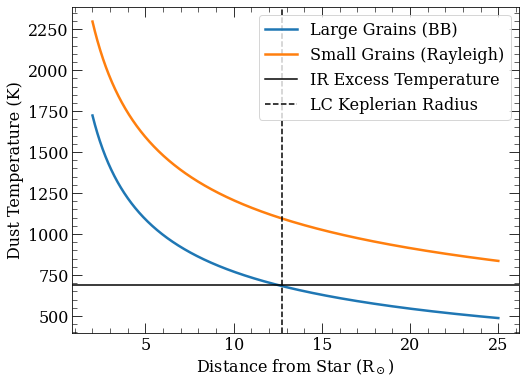

In [5]:
plt.plot(r_grid, T_bb(T_star, R_star, r_grid), label = 'Large Grains (BB)', lw = 2.5)
plt.plot(r_grid, T_rayl(T_star, R_star, r_grid), label = 'Small Grains (Rayleigh)', lw = 2.5)

plt.ylabel('Dust Temperature (K)')
plt.xlabel('Distance from Star ($R_\odot$)')

plt.axhline(T_excess, color = 'k', linestyle = '-', label = 'IR Excess Temperature')
plt.axvline(R_LC, color = 'k', linestyle = '--', label = 'LC Keplerian Radius')

plt.legend()
#plt.savefig('fig/dust_temperature.jpg', dpi = 300)

# Jura Disk Model

In [6]:
def jura_disk(wl, D, i, T_star, R_star, T_in, T_out):
    
    nu = c.c / (wl * 1e-10 * u.m)
    R_star = R_star * c.R_sun
    D = D * c.pc
    T_star = T_star * u.K
    T_in = T_in * u.K
    T_out = T_out * u.K
    
    t1 = 12 * np.pi**(1/3) * R_star**2 * np.cos(i) / D**2
    t2 = (2 * c.k_B * T_star / (3 * c.h * nu)) ** (8 / 3)
    t3 = c.h * nu**3 / c.c**2
    
    xmin = c.h * nu / (c.k_B * T_in)
    xmax = c.h * nu / (c.k_B * T_out)

    fn = lambda x: x**(5/3) / (np.exp(x) - 1)
    t4 = integrate.quad(fn, xmin.value, xmax.value)[0]
        
    return (t1*t2*t3*t4).to(u.Jy).value

def disk_model(wl, D, i, T_star, R_star, T_in, T_out):
    return np.array([jura_disk(wli, D, i, T_star, R_star, T_in, T_out) for wli in wl]) #* u.Jy

In [7]:
wl = np.logspace(4, 6, 100)

In [8]:
D = 100
i = 0
R_star = 0.2
T_star = 7500
T_in = 1200
T_out = 250

sed = disk_model(wl, D, i, T_star, R_star, T_in, T_out)

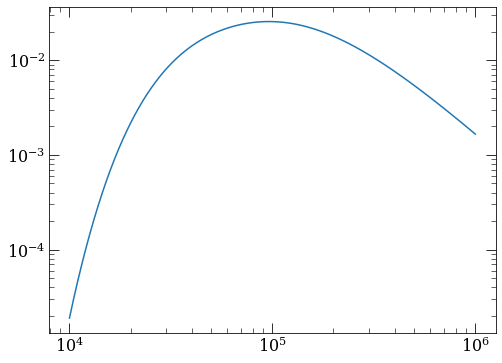

In [9]:
plt.plot(wl, sed)

plt.yscale('log')
plt.xscale('log')

## Tidal Radius

In [20]:
rho_star = 0.5 * c.M_sun / ((4/3) * np.pi * (R_star * c.R_sun)**3)
rho_a = (3 * u.g / (u.cm)**3).to(u.kg/u.m**3)
Ctide = 1

R_tide = Ctide * (rho_star / rho_a)**(1/3) * R_star

In [21]:
R_tide

<Quantity 0.61706846>